<a href="https://colab.research.google.com/github/YabrinaRantelili/MachineLearning_E1E122081/blob/main/Tugas1_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
bill = pd.read_csv('/content/bill_authentication.csv')

In [3]:
bill.head(10)

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.80730,-0.44699,0
1,4.54590,8.1674,-2.45860,-1.46210,0
2,3.86600,-2.6383,1.92420,0.10645,0
3,3.45660,9.5228,-4.01120,-3.59440,0
4,0.32924,-4.4552,4.57180,-0.98880,0
5,4.36840,9.6718,-3.96060,-3.16250,0
6,3.59120,3.0129,0.72888,0.56421,0
7,2.09220,-6.8100,8.46360,-0.60216,0
8,3.20320,5.7588,-0.75345,-0.61251,0
9,1.53560,9.1772,-2.27180,-0.73535,0


In [4]:
#memisakhan atribut dengan label dimana x itu atribut dan y
X = bill[['Variance','Skewness','Curtosis','Entropy']]
y = bill['Class']

#membagi dataset menjadi data latih dan data uji
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.1, random_state=123)


In [5]:
from sklearn.tree import DecisionTreeClassifier

#menentukan  model decision tree
tree_model= DecisionTreeClassifier()

#melatih model menggunakan data latih dengan fungsi fit
tree_model= tree_model.fit(X_train,y_train)

In [6]:
#evaluasi model untuk meguji seberapa baik model yang digunakan dan akurasi
from sklearn.metrics import accuracy_score

y_pred =  tree_model.predict(X_test)

accuracy_score =round(accuracy_score(y_pred, y_test), 3)

print('Accuracy: ',accuracy_score)

Accuracy:  0.993


In [7]:
#prediksi model dengan tree model yang sdh dibuat dengan varibel (['Variance','Skewness','Curtosis','Entropy'])

print(tree_model.predict([[5, 8, -3, -0.4]])[0])

0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [8]:
print(tree_model.predict([[-1, 3, -1.5, -2]])[0])


1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [11]:
#melihat visulisasi datanya decision tree
from sklearn.tree import export_graphviz

export_graphviz(tree_model,
                out_file="bill_tree.dot",
                feature_names=['Variance','Skewness','Curtosis','Entropy'],
                class_names=['0','1'],
                rounded=True,
                filled=True)


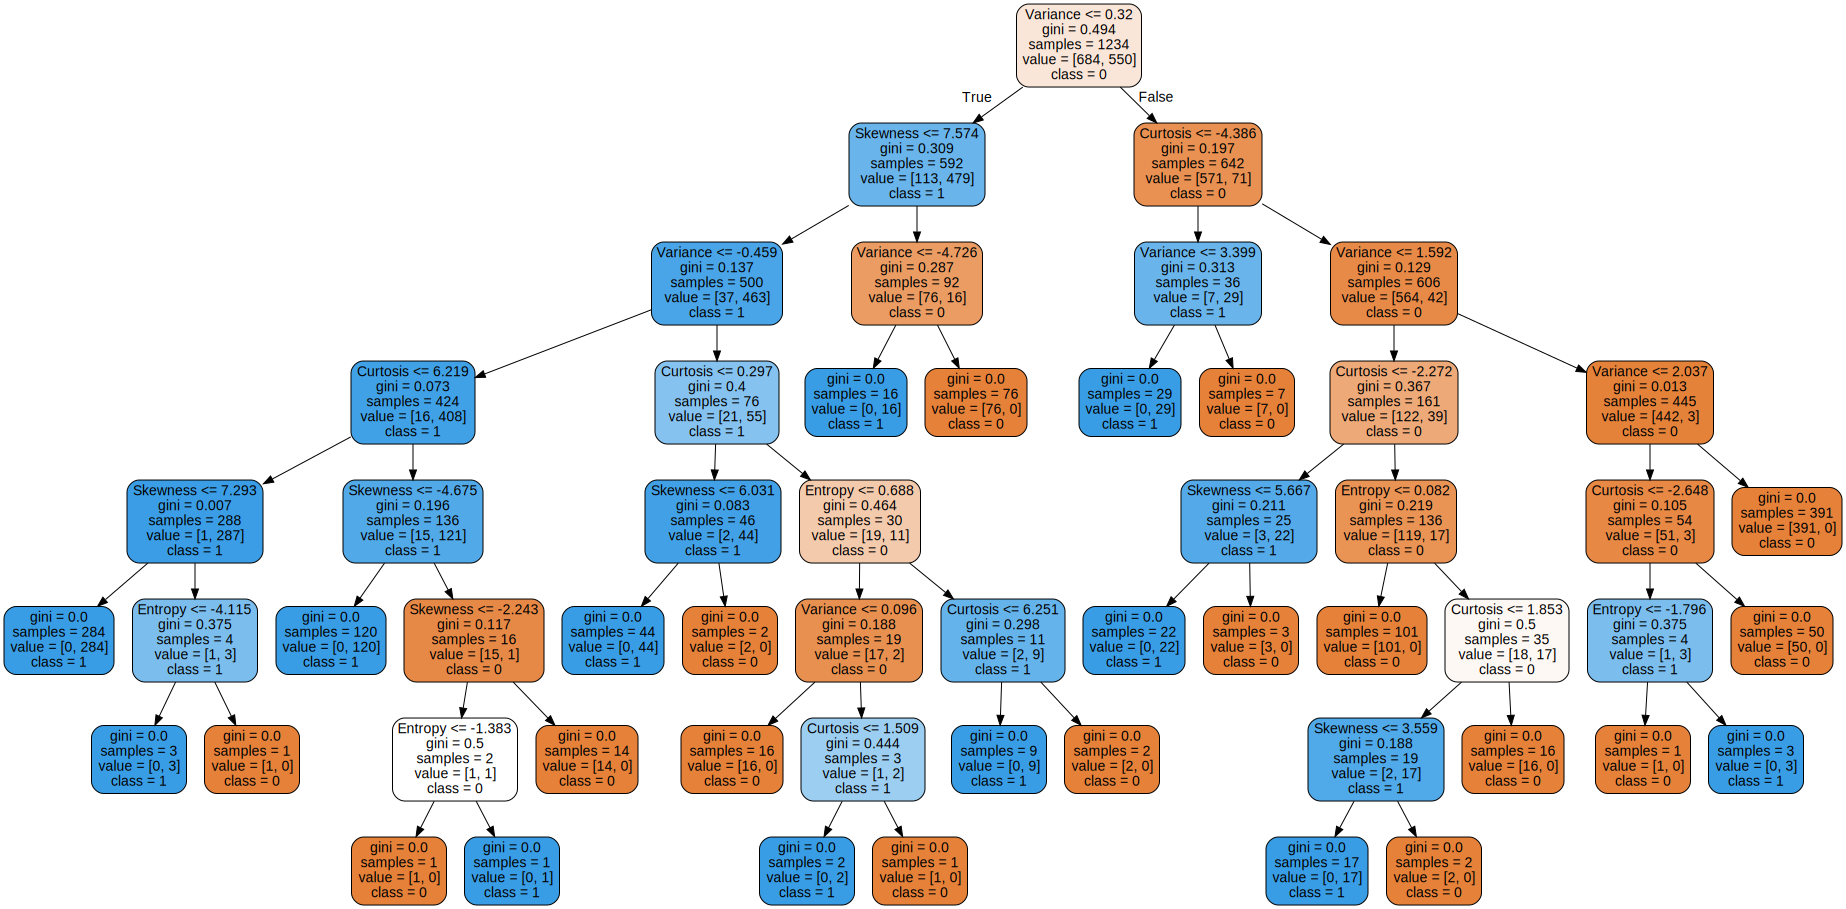

In [12]:
#konversi file .dot menjadi gambar
import graphviz
with open("bill_tree.dot") as f:
  dot_graph=f.read()
graphviz.Source(dot_graph)
